In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten 
#Shivraj
#https://drive.google.com/drive/u/0/folders/1dZvL1gi5QLwOGrfdn9XEsi4EnXx535bD

# Load Dataset

In [2]:
X_train =np.loadtxt('input.csv',delimiter =',')
Y_train =np.loadtxt('labels.csv',delimiter =',')
X_test =np.loadtxt('input_test.csv',delimiter =',')
Y_test =np.loadtxt('labels_test.csv',delimiter =',')

We can get the shape of the dataset using the code bellow

In [3]:
print("Shape of X_train:",X_train.shape)
print("Shape of Y_train:",Y_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of Y_test:",Y_test.shape)

Shape of X_train: (2000, 30000)
Shape of Y_train: (2000,)
Shape of X_test: (400, 30000)
Shape of Y_test: (400,)


We need to reshape these to appropriate shape of 100


In [4]:
X_train= X_train.reshape(len(X_train),100,100,3)
Y_train= Y_train.reshape(len(Y_train),1)
X_test= X_test.reshape(len(X_test),100,100,3)
Y_test= Y_test.reshape(len(Y_test),1)

We have done the reshaping.

lets check the size again

In [5]:
print("Shape of X_train:",X_train.shape)
print("Shape of Y_train:",Y_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of Y_test:",Y_test.shape)

Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: (2000, 1)
Shape of X_test: (400, 100, 100, 3)
Shape of Y_test: (400, 1)


In [6]:
#lets print single image data of any of these
X_train[1,:]

array([[[131., 128., 135.],
        [160., 157., 164.],
        [198., 192., 204.],
        ...,
        [250., 249., 247.],
        [255., 255., 253.],
        [250., 249., 245.]],

       [[140., 137., 144.],
        [127., 124., 131.],
        [120., 114., 124.],
        ...,
        [251., 253., 252.],
        [254., 255., 253.],
        [254., 255., 251.]],

       [[204., 202., 207.],
        [187., 185., 190.],
        [147., 142., 148.],
        ...,
        [249., 255., 255.],
        [238., 247., 242.],
        [232., 241., 236.]],

       ...,

       [[174., 182., 195.],
        [172., 180., 193.],
        [178., 186., 197.],
        ...,
        [ 87., 114.,  97.],
        [ 75.,  99.,  83.],
        [ 80., 105.,  86.]],

       [[166., 173., 189.],
        [164., 172., 185.],
        [172., 180., 193.],
        ...,
        [ 78., 106.,  84.],
        [ 72.,  97.,  76.],
        [ 77., 102.,  81.]],

       [[173., 180., 196.],
        [172., 179., 195.],
        [174., 1

here we can see the value between 0-255 which is typical RGB values.
For getting proper value we need to #Rescale these values between 0 to 1 so we will divide all with 255

In [7]:
X_train=X_train/255.0

In [8]:
X_test=X_test/255.0

now the value in the matrix are between 0-1

In [9]:
#lets print single image data of any of these
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

# Lets display an image form the training data set randomly

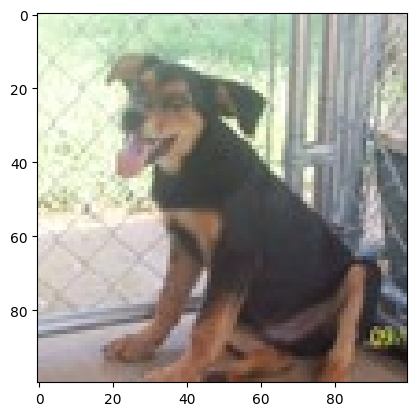

In [13]:
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

# Model

Sequential model is used to stack up the layers in sequential manner

In [14]:
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu',input_shape=(100, 100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3),activation = 'relu'),#input_shape is only of the first layer,
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3),activation = 'relu'),#input_shape is only of the first layer,
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation ='relu'),
    Dense(1, activation ='sigmoid') #for final result we need
])

In [15]:
#another way of defining the model 
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(100, 100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(100, 100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(100, 100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation ='relu'))
model.add(Dense(1, activation ='sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])


1.loss function is based on what kind of values we are using as there are two values cat and dog so we have 2 values that is a binary value.
2.optimizer 'adam' is a hyper parameter that we use otherwise it will take a default hyper parameter.

In [ ]:
model.fit(X_train,Y_train,epochs=10, batch_size=64)

Epoch 1/10
32/32 [==============================] - 7s 196ms/step - loss: 0.6924 - accuracy: 0.5345
Epoch 2/10
32/32 [==============================] - 6s 196ms/step - loss: 0.6827 - accuracy: 0.5715
Epoch 3/10
32/32 [==============================] - 6s 193ms/step - loss: 0.6537 - accuracy: 0.6020
Epoch 4/10
32/32 [==============================] - 6s 181ms/step - loss: 0.6152 - accuracy: 0.6650
Epoch 5/10
32/32 [==============================] - 6s 183ms/step - loss: 0.5794 - accuracy: 0.6900
Epoch 6/10
32/32 [==============================] - 6s 183ms/step - loss: 0.5504 - accuracy: 0.7120
Epoch 7/10
 5/32 [===>..........................] - ETA: 4s - loss: 0.5156 - accuracy: 0.7500

-epoch is noting but the iteration

-we can do as many time we want that will imporve the accuracy


In [19]:
#now lets check the test accuracy 
model.evaluate(X_test, Y_test)

13/13 [==============================] - 0s 21ms/step - loss: 0.9152 - accuracy: 0.7075


[0.9151845574378967, 0.7074999809265137]

# Making predictions

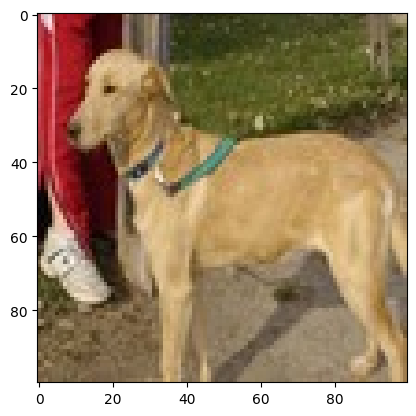

NameError: name 'model' is not defined

In [12]:
idx2=random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred=model.predict(X_test[idx2,:].reshape(1,100,100,3))
print(y_pred)

as u can see above we are gettinga a probablistic value.

So if any value which is greater the 0.5 we will consider it as 1 and less then that as 0


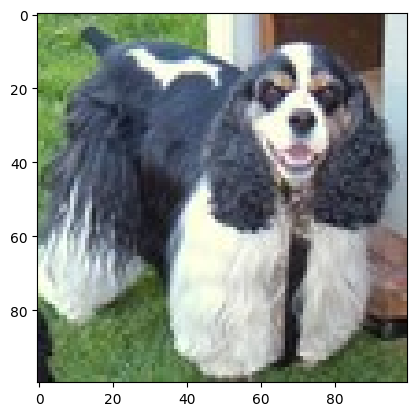

1/1 [==============================] - 0s 36ms/step
[[0.00994596]]
Prediction of the img : dog


In [20]:
idx2=random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred=model.predict(X_test[idx2,:].reshape(1,100,100,3))
print(y_pred)

if(y_pred>=0.5):
    pred='cat'
else:
    pred='dog'
print("Prediction of the img :",pred)